#Self Organizing Map

##Install MiniSom Package

In [ ]:
!pip install MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.1-py3-none-any.whl size=10609 sha256=435c86ea28e8742a12cb34dc907f088851e44036734093bb8536942e0793e163
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built MiniSom


### Importing the libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## Importing the dataset

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/deeplearn/Part 4 - Self_Organizing_Maps/Credit_Card_Applications.csv")

In [ ]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

* SOM is only using X.

## Feature Scaling


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

##Training the SOM


In [ ]:
from minisom import MiniSom

som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)

In [ ]:
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

##Visualizing the results


In [ ]:
from pylab import bone, pcolor, colorbar, plot, show

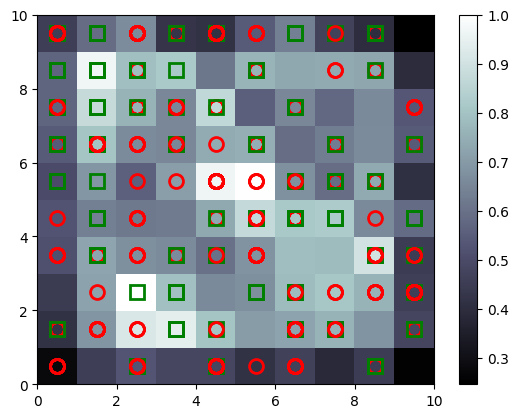

In [ ]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ["o", "s"]
colors = ["r", "g"]
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor="None",
         markersize=10,
         markeredgewidth=2)
show()

## Finding the frauds


In [ ]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(2, 2)], mappings[(4, 5)], mappings[(5, 5)], mappings[(1, 8)]), axis=0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [ ]:
pd.DataFrame(frauds)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15645820.0,0.0,18.08,0.375,3.0,13.0,1.0,10.000,0.0,0.0,0.0,1.0,1.0,300.0,1.0
1,15594305.0,0.0,23.75,0.710,2.0,9.0,4.0,0.250,0.0,1.0,1.0,1.0,2.0,240.0,5.0
2,15664793.0,0.0,17.33,9.500,2.0,6.0,4.0,1.750,0.0,1.0,10.0,1.0,2.0,0.0,11.0
3,15670029.0,0.0,16.92,0.500,2.0,3.0,4.0,0.165,0.0,1.0,6.0,1.0,2.0,240.0,36.0
4,15763579.0,0.0,16.00,0.165,2.0,6.0,4.0,1.000,0.0,1.0,2.0,1.0,2.0,320.0,2.0
5,15662189.0,0.0,28.58,3.750,2.0,8.0,4.0,0.250,0.0,1.0,1.0,1.0,2.0,40.0,155.0
6,15793825.0,0.0,31.92,3.125,2.0,1.0,1.0,3.040,0.0,1.0,2.0,1.0,2.0,200.0,5.0
7,15696361.0,0.0,31.57,1.500,2.0,1.0,1.0,0.000,0.0,1.0,2.0,1.0,2.0,200.0,106.0
8,15568469.0,0.0,15.83,7.625,2.0,11.0,4.0,0.125,0.0,1.0,1.0,1.0,2.0,0.0,161.0
9,15782159.0,0.0,22.67,0.750,2.0,8.0,4.0,2.000,0.0,1.0,2.0,1.0,2.0,200.0,395.0


In [ ]:
dataset[dataset["CustomerID"].isin(pd.DataFrame(frauds).iloc[:, 0])]

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
61,15594305,0,23.75,0.710,2,9,4,0.250,0,1,1,1,2,240,5,0
98,15664793,0,17.33,9.500,2,6,4,1.750,0,1,10,1,2,0,11,0
176,15638983,0,56.83,4.250,1,1,1,5.000,0,0,0,1,2,0,5,0
177,15654625,0,53.33,0.165,2,1,1,0.000,0,0,0,1,1,62,28,0
245,15670029,0,16.92,0.500,2,3,4,0.165,0,1,6,1,2,240,36,0
246,15763579,0,16.00,0.165,2,6,4,1.000,0,1,2,1,2,320,2,0
265,15662189,0,28.58,3.750,2,8,4,0.250,0,1,1,1,2,40,155,0
291,15793825,0,31.92,3.125,2,1,1,3.040,0,1,2,1,2,200,5,0
296,15696361,0,31.57,1.500,2,1,1,0.000,0,1,2,1,2,200,106,0
304,15568469,0,15.83,7.625,2,11,4,0.125,0,1,1,1,2,0,161,0
